# NYC Schools #
New York City schools are organized by geographic borough: Manhattan, Bronx, Brooklyn, Queens, and Staten Island

# Import libraries

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preview the dataset

In [25]:
path = './high-school-directory.csv'
df = pd.read_csv(path)
df

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,02M300,Urban Assembly School of Design and Constructi...,Manhattan,M535,212-586-0981,212-586-1731,9.0,12,NaN,NaN,...,3.0,135.0,1083802.0,1.010790e+09,Clinton ...,12081.0,12,4,10,10
431,09X412,Bronx High School of Business,Bronx,X410,718-410-4060,718-992-5760,9.0,12,NaN,NaN,...,16.0,225.0,2007806.0,2.028170e+09,East Concourse-Concourse Village ...,10935.0,50,5,42,27
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53
433,02M407,Institute for Collaborative Education,Manhattan,M475,212-475-7972,212-475-0459,6.0,12,NaN,NaN,...,2.0,48.0,1020419.0,1.009220e+09,Gramercy ...,11724.0,71,4,50,7


# Clean column names

In [26]:
# Clean column names: make all lowercase, replace spaces and special characters with underscores
df.columns = (df.columns.str.lower().str.replace(r' ', '_', regex=True)).str.replace(r'[^\w]+', '_', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

The columns name are cleaned.

# Total unique schools in Brooklyn

In [27]:
# Dataframe filtered to include only schools located in Brooklyn
df_brooklyn = df[df['borough'] == 'Brooklyn']
df_brooklyn['dbn'].nunique()

121

Totally  in Brooklyn there are 121 unique schools.

# Number of schools in Brooklyn offer Grade 9 entry. 

In [28]:
# Number of schools in Brooklyn offer Grade 9 entry.
df_brooklyn_9 = df_brooklyn[(df_brooklyn['grade_span_min'] <= 9) & (df_brooklyn['grade_span_max'] >= 9)]
df_brooklyn_9['dbn'].nunique()

121

all schools in Brooklyn offer Grade 9 entry

# Group and summary

In [29]:
# Count unique schools per borough
df_school_count = df.groupby('borough')['dbn'].nunique().sort_values(ascending=False)
df_school_count


borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

In [30]:
#average number of students per borough
df_avg_stud = df.groupby('borough')['total_students'].mean().round().sort_values(ascending=False)
df_avg_stud

borough
Staten Island    1848.0
Queens           1047.0
Brooklyn          699.0
Manhattan         590.0
Bronx             490.0
Name: total_students, dtype: float64

In [31]:
# Summary of 'grade_span_max' grouped by borough
df.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


# Create a bar plot of school counts per borough

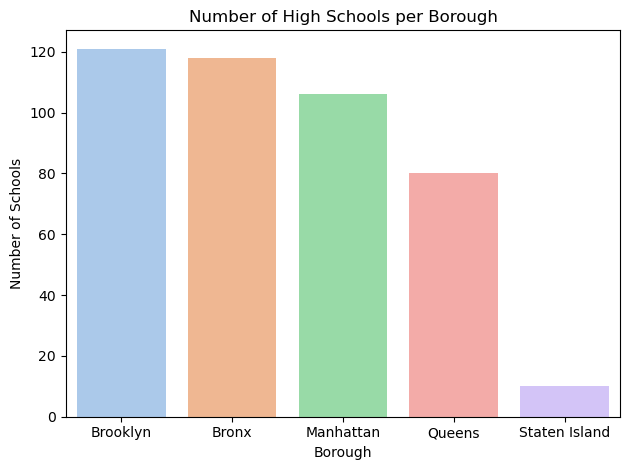

In [32]:
import warnings as wrg
wrg.filterwarnings('ignore')

# Reset index to get borough as a column for seaborn
df_school_count_plot = df_school_count.reset_index()
df_school_count_plot.columns = ['borough', 'school_count']

# Plot using seaborn
sns.barplot( data=df_school_count_plot, x='borough', y='school_count', palette='pastel')
plt.title('Number of High Schools per Borough')   
plt.xlabel('Borough')                            
plt.ylabel('Number of Schools')  

plt.xticks(rotation=0)                           
plt.tight_layout()                               
plt.show()                                      

In [33]:
df['grade_span_min'].value_counts().sort_index()

grade_span_min
6.0     79
7.0      2
9.0    351
Name: count, dtype: int64

In [34]:
df['grade_span_max'].value_counts().sort_index()

grade_span_max
9       3
10      9
11     19
12    404
Name: count, dtype: int64

# Insights 
• The dataset included 121 different schools bouroughs Brooklyn. 

• Borough Brooklyn has the most and Staaten Island  has the fewest number of  schools.

• In NYC there are some schools in Bronx, Brooklyn and Manhattan that are only until grade 9.